# t検定をスクラッチで実装する

t検定は **母平均** に対する検定。「グループA,Bの平均値が異なるかどうか」、「Aの平均値が0かどうか」など

## 1. データセット

グループA：平均50、標準偏差10の正規分布から1000個ランダムサンプリング  
グループB：平均48、標準偏差12の正規分布から1200個ランダムサンプリング

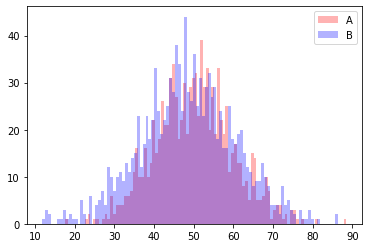

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

m = 1000
n = 1200
a = np.random.normal(loc=50, scale=10, size=m)
b = np.random.normal(loc=48, scale=12, size=n)

plt.hist(a, bins=100, alpha=0.3, histtype='stepfilled', color='r', label='A')
plt.hist(b, bins=100, alpha=0.3, histtype='stepfilled', color='b', label='B')
plt.legend()

## 2. Studentのt検定（等分散を仮定）

今回のデータは対応がない2群のt検定となる。ここでは等分散を仮定したt検定を実施

### 2-1. 各種統計量を求める

In [2]:
# a 平均と不偏分散
a_mean = a.mean()
a_var = a.var(ddof=1)
# b 平均と不偏分散
b_mean = b.mean()
b_var = b.var(ddof=1)

In [3]:
# poolした分散
s_2 = ((m - 1) * a_var + (n - 1) * b_var) / (m + n - 2)
# 自由度
dof = m + n - 2

### 2-2. t値、p値を求める

In [4]:
from scipy.stats import t

t_value = (a_mean - b_mean) / (np.sqrt(s_2 * (1/m + (1/n))))

dof = m + n - 2
p_value = min(t.cdf(t_value, dof), 1-t.cdf(t_value, dof)) * 2

print(f't値：{t_value} p値：{p_value}')

t値：3.4287178596465306 p値：0.0006176178409258437


### 2-3. scipyのt検定

In [5]:
from scipy import stats

stats.ttest_ind(a, b)

Ttest_indResult(statistic=3.4287178596465306, pvalue=0.0006176178409258371)

値がほぼ一致していることが分かる。

## 3. Weltchのt検定（等分散を仮定しない）

### 3-1. 各種統計量を求める

In [6]:
# a 平均と不偏分散
a_mean = a.mean()
a_var = a.var(ddof=1)
# b 平均と不偏分散
b_mean = b.mean()
b_var = b.var(ddof=1)

In [7]:
# 使用する分散
s_2 = a_var / m + b_var / n
# 自由度
dof = int((a_var / m + b_var / n)**2 / (((a_var/m)**2 / (m-1)) + ((b_var/n)**2 / (n-1))))

### 3-2. t値、p値を求める

In [8]:
from scipy.stats import t

t_value = (a_mean - b_mean) / np.sqrt(s_2)
p_value = min(t.cdf(t_value, dof), 1-t.cdf(t_value, dof)) * 2

print(f't値：{t_value} p値：{p_value}')

t値：3.490154519416705 p値：0.000492256894277121


### 3-3. scipyのt検定

In [9]:
stats.ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=3.490154519416705, pvalue=0.0004922547773957867)

値がほぼ一致している

## 4. 関数化

以上を踏まえた上で、１つの関数にする

In [10]:
from scipy.stats import t
import numpy as np


def t_test(a_mean, a_var, a_n, b_mean, b_var, b_n, equal_var=True):
    # Studentのt検定
    if equal_var:
        s_2 = ((a_n - 1) * a_var + (b_n - 1) * b_var) / (a_n + b_n - 2)
        dof = a_n + b_n - 2
    # Weltchのt検定
    else:
        s_2 = a_var / a_n + b_var / b_n
        dof = int((a_var / a_n + b_var / b_n)**2 / (((a_var/ a_n)**2 / (a_n-1)) + ((b_var/b_n)**2 / (b_n-1))))
    
    t_value = (a_mean - b_mean) / np.sqrt(s_2)
    p_value = min(t.cdf(t_value, dof), 1-t.cdf(t_value, dof)) * 2

    print(f'TtestResult(statistic={t_value}, pvalue={p_value})')